In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

XỬ LÝ DỮ LIỆU ĐẦU VÀO

In [17]:
# Đọc file CSV vào DataFrame
df = pd.read_csv("C://Users//84326//Documents//ML//data-tbtl//annonimized.csv")
df.head(10)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:29:03,10-09 09:30:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
6,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:29:58,10-09 09:30:08,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:32:17,10-09 09:42:54,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
8,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:33:36,10-09 09:33:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
9,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:34:05,10-09 09:34:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."


In [18]:
# Xóa các cột không cần thiết
df.drop(['coefficient', 'concat(\'it001\',`language_id`)', 'judgement','created_at','updated_at','is_final'], axis=1, inplace=True)
# Lọc các hàng có giá trị 'status' là 'Compilation Error'
df = df[df['status'] != 'Compilation Error']
# Đổi tên các cột để dễ xử lý
df.rename(columns={
    "concat('it001',`assignment_id`)": 'assignment_id',
    "concat('it001',`problem_id`)": 'problem_id',
    "concat('it001', username)": 'username'
}, inplace=True)
df.head(10)

,assignment_id,problem_id,username,status,pre_score
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
6,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
12,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
13,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
14,90ce27571176d87961b565d5ef4b3de33ede04ac,cdcd804fa38c80b91cc9ceef05c1734b0cbcce94,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000
15,90ce27571176d87961b565d5ef4b3de33ede04ac,9ec58869b69a632e3cba27924e342ba40eb378b0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,SCORE,10000


- Thực hiện tính toán:  Với mỗi username cho ra 3 cột:
  + Tổng số assigment đã làm 
  + Tổng số problem đã làm 
  + điểm trung bình : (điểm cao nhất của mỗi problem ) / số problem 

In [19]:
# Nhóm dữ liệu theo 'username' và thực hiện các tính toán
result = df.groupby('username').agg(
    total_assignments=('assignment_id', 'nunique'),
    total_problems=('problem_id', 'nunique'),
    avg_score=('pre_score', lambda x: x.groupby(df['problem_id']).max().mean())
).reset_index()

# Lưu lại DataFrame kết quả vào file CSV mới
result.to_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu.csv", index=False)
result.head(10)

,username,total_assignments,total_problems,avg_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7,46,10000.000000
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,9,77,9772.714286
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7,65,9466.153846
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,4,47,10000.000000
4,013de369c439ab0ead8aa7da64423aa395a8be39,8,52,8954.346154
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9,84,9476.190476
6,0155f91fe242fe55e1af631b0f0afbe9938b185c,8,45,9600.000000
7,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,10,75,9572.213333
8,017ec1bbad0d598e5a86ac3bd595b870b6456e61,11,91,9682.879121
9,01ad03ec301749c033155fc17e657cc767d447c8,12,71,9692.197183


- Sử dụng file vừa xử lý cùng với file của thầy đưa để hợp nhất theo cột username 

In [20]:
# Đọc file CSV đầu tiên (file đã xử lý trước đó)
file1 = pd.read_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu.csv")

# Đọc file CSV thứ hai (file chứa ID sinh viên và điểm quá trình)
file2 = pd.read_csv("C://Users//84326//Documents//ML//public_it001//qt-public.csv")

# Hợp nhất hai file dựa trên ID sinh viên (giả sử cột ID sinh viên có tên là 'username')
merged_df = pd.merge(file1, file2, how='left', left_on='username', right_on='hash')

# Xóa cột dư thừa nếu cần (cột student_id từ file2)
merged_df.drop(['hash'], axis=1, inplace=True)

# Lưu lại DataFrame đã hợp nhất vào file CSV mới
merged_df.to_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu1.csv", index=False)
merged_df.head(10)


,username,total_assignments,total_problems,avg_score,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7,46,10000.000000,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,9,77,9772.714286,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7,65,9466.153846,9
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,4,47,10000.000000,NaN
4,013de369c439ab0ead8aa7da64423aa395a8be39,8,52,8954.346154,10
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9,84,9476.190476,9
6,0155f91fe242fe55e1af631b0f0afbe9938b185c,8,45,9600.000000,9
7,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,10,75,9572.213333,8
8,017ec1bbad0d598e5a86ac3bd595b870b6456e61,11,91,9682.879121,8
9,01ad03ec301749c033155fc17e657cc767d447c8,12,71,9692.197183,7


- Sau Khi kiểm tra xong ta thấy file vẫn còn nhiều thứ chưa được xử lý:
  + avg_score chưa đưa về thang điểm 10
  + nhiều giá trị trong cột diemqt bị lỗi

In [22]:
df = pd.read_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu1.csv")
# Đưa cột 'avg_score' về thang điểm 10
df['avg_score'] = df['avg_score'] / 1000
# Chuyển các giá trị lỗi trong cột 'diemqt' thành giá trị trống (NaN)
df['diemqt'] = pd.to_numeric(df['diemqt'], errors='coerce')


In [23]:
df.head()

,username,total_assignments,total_problems,avg_score,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7,46,10.000000,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,9,77,9.772714,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7,65,9.466154,9.0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,4,47,10.000000,NaN
4,013de369c439ab0ead8aa7da64423aa395a8be39,8,52,8.954346,10.0


- Về Model, bọn em sẽ dụng một vài cái tiêu biểu để đánh giá, đồng thời đưa ra chỉ số MSE để xem mô hình nào tốt nhất:
  + Linear Regression
  + Random Forest
  + Gradient Boosting
  + XGBoost

In [24]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
df_train = df[df['diemqt'].notna()]
df_test = df[df['diemqt'].isna()]

# Chọn các cột tính năng (features) và cột mục tiêu (target)
features = ['total_assignments', 'total_problems', 'avg_score']
target = 'diemqt'

# Chia dữ liệu huấn luyện thành các tập con huấn luyện và kiểm tra
X_train, X_val, y_train, y_val = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Huấn luyện và đánh giá các mô hình
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f'{name} Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 2.6064217056304972
Random Forest Mean Squared Error: 2.6049534836549926
Gradient Boosting Mean Squared Error: 2.6098871147034015
XGBoost Mean Squared Error: 3.855691531003769


Ta sẽ vẽ biểu đồ phân tán (scatter plot) cho 4 mô hình này 
 (Biểu đồ phân tán là biểu đồ cho thấy mối quan hệ giữa giá trị thực tế và giá trị dự đoán, đường màu đỏ là đường lý tưởng nếu dự đoán hoàn toàn chính xác.)

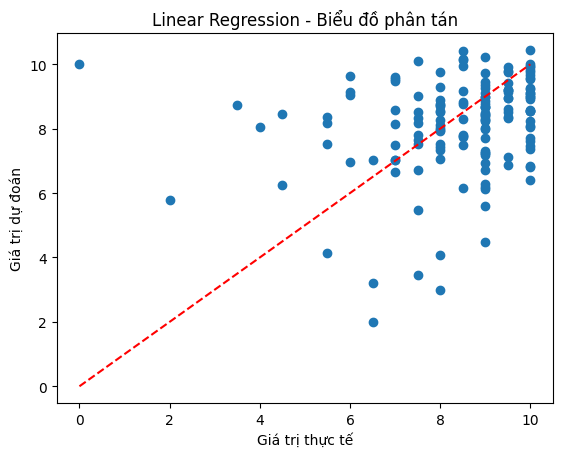

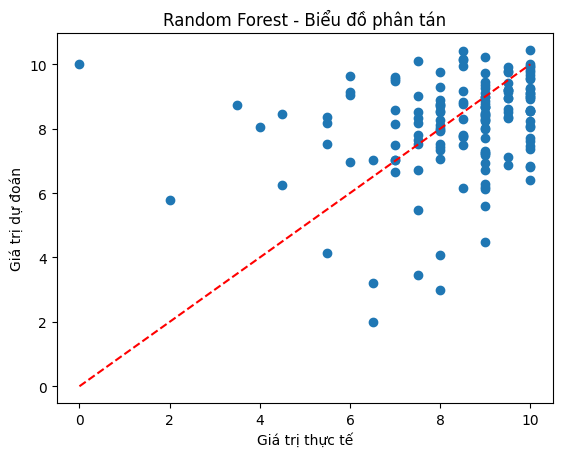

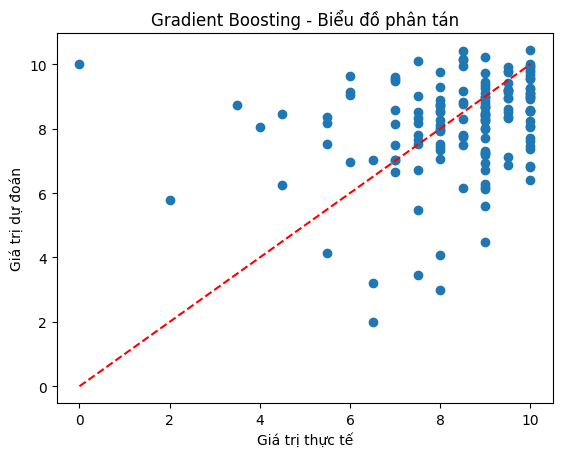

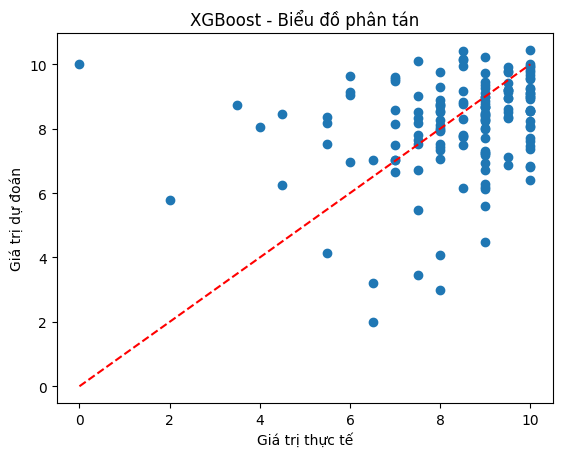

In [25]:
for name, model in models.items():
    # Vẽ biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
    plt.figure()
    plt.scatter(y_val, y_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
    plt.xlabel('Giá trị thực tế')
    plt.ylabel('Giá trị dự đoán')
    plt.title(f'{name} - Biểu đồ phân tán')
    plt.show()

-> Ta thấy có Ngoại trừ XGBoost  ra thì 3 mô hình còn lại cho MSE nhỏ hơn và gần bằng nhau. Tiếp theo em sẽ dùng mô hình Linear Regression để dự đoán điểm 

In [26]:


# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán điểm cho tập kiểm tra
y_pred = model.predict(X_val)

# Dự đoán điểm cho các hàng bị trống trong cột 'diemqt'
df_test['diemqt'] = model.predict(df_test[features])


# Lưu lại DataFrame cuối cùng vào file CSV mới
df_test.to_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu2.csv", index=False)

# In ra kết quả
print(df_test)



                                      username  total_assignments  \
3     0134f9f410c65ad0e8c2254a7e9288670e02a183                  4   
20    035f97702f2c01d26ab1fae8f39ea2f98a0caa3c                  4   
40    06024da8147b5cf6105beb4c403f67cf1ff0aea1                  1   
68    0aaebc88f6106684d6993c156104c1ef36cf94e0                  4   
79    0bf111a9caedf02804f6991792490e63bc21058a                  6   
...                                        ...                ...   
1471  feb8a2859a011c59efd22ed419cb69288fe03627                  9   
1472  fef4a3263ed9a8ab14d457694bb8fd86ccd98312                  6   
1473  ff12d6e2ab80696ed8e22fbe5497e96c68d29076                  6   
1474  ff3fa2ec64294f37ae968159f810ebeda7966c51                  7   
1475  ffe872165621d735a48bb5db0c71dd5195cba359                 10   

      total_problems  avg_score    diemqt  
3                 47  10.000000  8.225356  
20                50  10.000000  8.251037  
40                 5  10.000000  7.9924

C:\Users\84326\AppData\Local\Temp\ipykernel_29284\663059705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['diemqt'] = model.predict(df_test[features])


- Cuối cùng để nộp bài, Cần phải xử lý những cột feature 

In [27]:
# Đọc file CSV vào DataFrame
df = pd.read_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu2.csv")
# Xóa các cột không cần thiết
df.drop(['total_assignments', 'total_problems', 'avg_score'], axis=1, inplace=True)
df.to_csv("C://Users//84326//Documents//ML//data-tbtl//xulydulieu3.csv",index=False)
df.head()

,username,diemqt
0,0134f9f410c65ad0e8c2254a7e9288670e02a183,8.225356
1,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,8.251037
2,06024da8147b5cf6105beb4c403f67cf1ff0aea1,7.992478
3,0aaebc88f6106684d6993c156104c1ef36cf94e0,8.251037
4,0bf111a9caedf02804f6991792490e63bc21058a,8.326634
